In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math

Total loss = $Loss_{data points} + Loss_{PDE} + Loss_{BC}$

We define our points as $y=2x$

In [2]:
length = 11
datax = np.arange(length)
datay = datax * 2
# noise = [np.random.random() * length / 3 for i in range(length)]
# datay = datay + noise

data = np.vstack([datax, datay])
# data = data.T

print(data)

[[ 0  1  2  3  4  5  6  7  8  9 10]
 [ 0  2  4  6  8 10 12 14 16 18 20]]


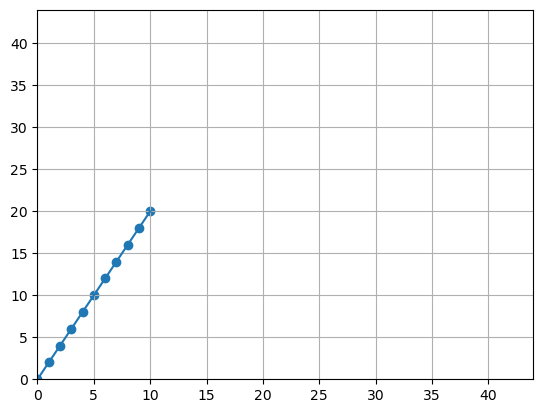

In [3]:
plt.plot(data[0], data[1])
plt.scatter(data[0], data[1])
plt.grid(which="Major")
plt.xlim(0, length * 4)
plt.ylim(0, length * 4)
plt.show()

In [4]:
data = torch.tensor(data, dtype = torch.float32)
print(data[0])
print(data[1])
input_data = data[0].view(-1, 1)
target_data = data[1].view(-1, 1)
# print(input_data)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
tensor([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.])


In [5]:
# train the NN for these data points
class simple_Tanh_NN(nn.Module):
  def __init__(self):
    super(simple_Tanh_NN, self).__init__()
    self.linear_tanh_stack = nn.Sequential(
      nn.Linear(1, 16),
      nn.Tanh(),
      nn.Linear(16, 32),
      nn.Tanh(),
      nn.Linear(32, 16),
      nn.Tanh(),
      nn.Linear(16, 1),
    )
  def forward(self, x):
    out = self.linear_tanh_stack(x)
    return out

In [6]:
# train the NN for these data points
class simple_ReLU_NN(nn.Module):
  def __init__(self):
    super(simple_ReLU_NN, self).__init__()
    self.linear_ReLU_stack = nn.Sequential(
      nn.Linear(1, 16),
      nn.ReLU(),
      nn.Linear(16, 32),
      nn.ReLU(),
      nn.Linear(32, 16),
      nn.ReLU(),
      nn.Linear(16, 1),
    )
  def forward(self, x):
    out = self.linear_ReLU_stack(x)
    return out

In [7]:
# train the NN for these data points
class simple_Sigmoid_NN(nn.Module):
  def __init__(self):
    super(simple_Sigmoid_NN, self).__init__()
    self.linear_Sigmoid_stack = nn.Sequential(
      nn.Linear(1, 16),
      nn.Sigmoid(),
      nn.Linear(16, 32),
      nn.Sigmoid(),
      nn.Linear(32, 16),
      nn.Sigmoid(),
      nn.Linear(16, 1),
    )
  def forward(self, x):
    out = self.linear_Sigmoid_stack(x)
    return out

In [8]:
# train the NN
model = simple_ReLU_NN()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

for ep in range(1000):
  pred = model(input_data)
  loss = loss_fn(pred, target_data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if ep % 200 == 0:
    print(f"epoch: {ep}, loss: {loss.item():>7f}")


epoch: 0, loss: 136.382965
epoch: 200, loss: 0.000310
epoch: 400, loss: 0.000000
epoch: 600, loss: 0.000000
epoch: 800, loss: 0.000000


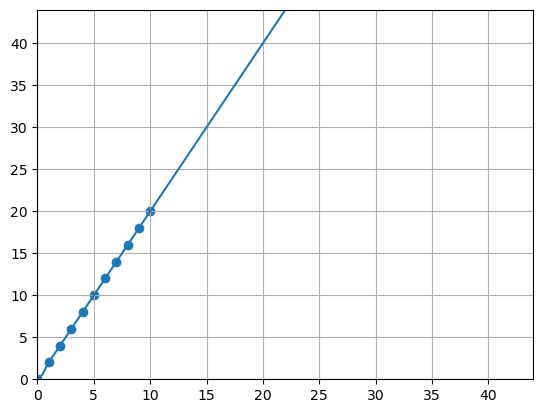

In [9]:
domain = [0.0, 4.0 * length]
x_eval = torch.linspace(domain[0], domain[1], steps=100).reshape(-1, 1)
f_eval = model(x_eval)

plt.plot(x_eval.detach().numpy(), f_eval.detach().numpy() )
plt.scatter(input_data.detach().numpy(), target_data.detach().numpy())
plt.grid(which="Major")
plt.xlim(0, length * 4)
plt.ylim(0, length * 4)
plt.show()

# Now we make it a projectile motion

In [10]:
vx = 15 # m/s
vy = 15 # m/s
g = 9.81
delta_t = 0.1 # s
x_init = 0.0
y_init = 0.1
x = []
y = []
t = 0

xi = x_init
yi = y_init
while (yi >= 0):
  xi = xi + vx * delta_t
  yi = yi + vy * delta_t
  vy = vy + -g * delta_t

  t += delta_t

  x.append(xi)
  y.append(yi)
  # print("x: ", xi, " y: ", yi)
  # print("vx: ", vx, " vy: ", vy)


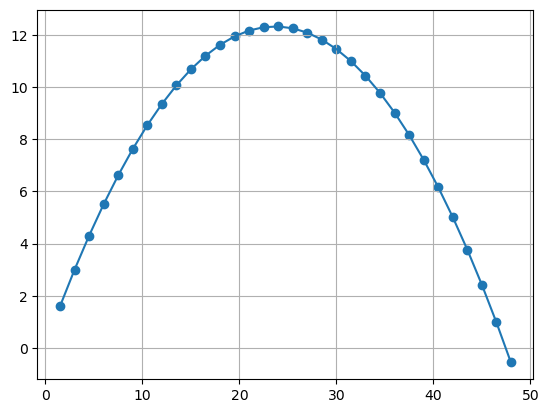

In [11]:
plt.plot(x, y)
plt.scatter(x, y)
plt.grid(which="Major")
plt.show()

In [12]:
x = torch.tensor(x).view(-1, 1)
y = torch.tensor(y).view(-1, 1)

x_original = torch.tensor(x.detach().clone()).view(-1, 1)
y_original = torch.tensor(y.detach().clone()).view(-1, 1)

x_second_half = torch.tensor(x.detach().clone()).view(-1, 1)
y_second_half = torch.tensor(y.detach().clone()).view(-1, 1)

x_second_half = x_second_half[math.floor(len(x)/2):]
y_second_half = y_second_half[math.floor((len(y))/2):]


x = x[:math.floor(len(x)/2)]
y = y[:math.floor(len(y)/2)]


print(x_original)
print(x)


tensor([[ 1.5000],
        [ 3.0000],
        [ 4.5000],
        [ 6.0000],
        [ 7.5000],
        [ 9.0000],
        [10.5000],
        [12.0000],
        [13.5000],
        [15.0000],
        [16.5000],
        [18.0000],
        [19.5000],
        [21.0000],
        [22.5000],
        [24.0000],
        [25.5000],
        [27.0000],
        [28.5000],
        [30.0000],
        [31.5000],
        [33.0000],
        [34.5000],
        [36.0000],
        [37.5000],
        [39.0000],
        [40.5000],
        [42.0000],
        [43.5000],
        [45.0000],
        [46.5000],
        [48.0000]])
tensor([[ 1.5000],
        [ 3.0000],
        [ 4.5000],
        [ 6.0000],
        [ 7.5000],
        [ 9.0000],
        [10.5000],
        [12.0000],
        [13.5000],
        [15.0000],
        [16.5000],
        [18.0000],
        [19.5000],
        [21.0000],
        [22.5000],
        [24.0000]])


/tmp/ipykernel_22737/2730157103.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_original = torch.tensor(x.detach().clone()).view(-1, 1)
/tmp/ipykernel_22737/2730157103.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_original = torch.tensor(y.detach().clone()).view(-1, 1)
/tmp/ipykernel_22737/2730157103.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_second_half = torch.tensor(x.detach().clone()).view(-1, 1)
/tmp/ipykernel_22737/2730157103.py:8: UserWarning: To copy construct from a tensor, it is recommended to use source

In [13]:
# train the NN
model = simple_Tanh_NN()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

for ep in range(10000):
  pred = model(x)
  loss = loss_fn(pred, y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if ep % 200 == 0:
    print(f"epoch: {ep}, loss: {loss.item():>7f}")


epoch: 0, loss: 85.655968


epoch: 200, loss: 0.015988
epoch: 400, loss: 0.000313
epoch: 600, loss: 0.000108
epoch: 800, loss: 0.000069
epoch: 1000, loss: 0.000088
epoch: 1200, loss: 0.000062
epoch: 1400, loss: 0.000062
epoch: 1600, loss: 0.000061
epoch: 1800, loss: 0.000063
epoch: 2000, loss: 0.000062
epoch: 2200, loss: 0.000065
epoch: 2400, loss: 0.000064
epoch: 2600, loss: 0.000066
epoch: 2800, loss: 0.000065
epoch: 3000, loss: 0.000066
epoch: 3200, loss: 0.000066
epoch: 3400, loss: 0.000066
epoch: 3600, loss: 0.014730
epoch: 3800, loss: 0.000066
epoch: 4000, loss: 0.000127
epoch: 4200, loss: 0.000064
epoch: 4400, loss: 0.000065
epoch: 4600, loss: 0.030512
epoch: 4800, loss: 0.000065
epoch: 5000, loss: 0.000075
epoch: 5200, loss: 0.000066
epoch: 5400, loss: 0.000070
epoch: 5600, loss: 0.000137
epoch: 5800, loss: 0.000069
epoch: 6000, loss: 0.000072
epoch: 6200, loss: 0.000151
epoch: 6400, loss: 0.000065
epoch: 6600, loss: 0.000065
epoch: 6800, loss: 0.012999
epoch: 7000, loss: 0.000056
epoch: 7200, loss: 0.000

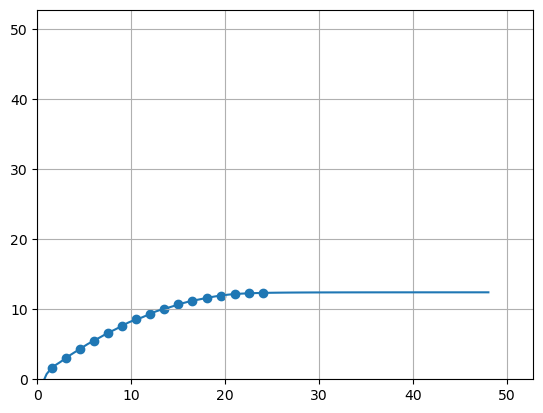

In [14]:
domain = [0.0, 2* float(x[-1])]
x_eval = torch.linspace(domain[0], domain[1], steps=100).reshape(-1, 1)
f_eval = model(x_eval)

plt.plot(x_eval.detach().numpy(), f_eval.detach().numpy() )
plt.scatter(x.detach().numpy(), y.detach().numpy())
plt.grid(which="Major")
plt.xlim(0, float(x[-1]) * 1.1 * 2)
plt.ylim(0, float(x[-1]) * 1.1 * 2)
plt.show()

In [15]:
# train the NN for these data points
class simple_Tanh_NN(nn.Module):
  def __init__(self):
    super(simple_Tanh_NN, self).__init__()
    self.linear_tanh_stack = nn.Sequential(
      nn.Linear(1, 16),
      nn.Tanh(),
      nn.Linear(16, 32),
      nn.Tanh(),
      nn.Linear(32, 16),
      nn.Tanh(),
      nn.Linear(16, 1),
    )
  def forward(self, x):
    x_scaled = x / 50.0
    out = self.linear_tanh_stack(x_scaled)
    return out * 50.0

In [16]:
# def physics_loss(model, x):
#   g = 9.81

#   y = model(x)
#   dy_dx = torch.autograd.grad(
#     outputs=y,
#     inputs=x,
#     grad_outputs=torch.ones_like(y),
#     create_graph=True
#   )[0]

#   d2y_dx2 = torch.autograd.grad(
#     outputs=dy_dx,
#     inputs=x,
#     grad_outputs=torch.ones_like(dy_dx),
#     create_graph=True
#   )[0]

#   physics_residual=d2y_dx2 + g
#   return torch.mean(physics_residual**2)

def physics_loss(model, x):
    g = 9.81
    vx = 15.0  # You must account for horizontal velocity
    # print(f"X: {x}")

    y = model(x)

    # First derivative dy/dx
    dy_dx = torch.autograd.grad(
        outputs=y,
        inputs=x,
        grad_outputs=torch.ones_like(y),
        create_graph=True
    )[0]

    # Second derivative d2y/dx2
    d2y_dx2 = torch.autograd.grad(
        outputs=dy_dx,
        inputs=x,
        grad_outputs=torch.ones_like(dy_dx),
        create_graph=True
    )[0]

    # CORRECT Equation: d2y/dx2 = -g / (vx^2)
    # Therefore residual is: d2y/dx2 + g / vx^2
    physics_residual = d2y_dx2 + (g / (vx**2))

    return torch.mean(physics_residual**2)

In [17]:
# train the NN
lambda_physics = 10  # 1e-1
x_physics = torch.linspace(0, 50, 100).view(-1, 1).requires_grad_(True)

model = simple_Tanh_NN()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

x.requires_grad_(True)

for ep in range(3000):
  optimizer.zero_grad()

  pred = model(x)
  loss_data = loss_fn(pred, y)

  lambda_data = 1e-4
  loss_phys = physics_loss(model, x_physics)
  loss = (lambda_data * loss_data) + (lambda_physics * loss_phys)


  loss.backward()
  optimizer.step()

  if ep % 500 == 0:
    print(f"epoch: {ep}, loss: {loss.item():>7f}")
    print(f"loss_data: {loss_data.item():>7f}, loss_physics: {loss_phys.item():>7f}")


epoch: 0, loss: 0.027358
loss_data: 83.188248, loss_physics: 0.001904
epoch: 500, loss: 0.000006
loss_data: 0.000098, loss_physics: 0.000001
epoch: 1000, loss: 0.000003
loss_data: 0.000063, loss_physics: 0.000000
epoch: 1500, loss: 0.000008
loss_data: 0.064071, loss_physics: 0.000000
epoch: 2000, loss: 0.000002
loss_data: 0.009731, loss_physics: 0.000000
epoch: 2500, loss: 0.000001
loss_data: 0.000010, loss_physics: 0.000000


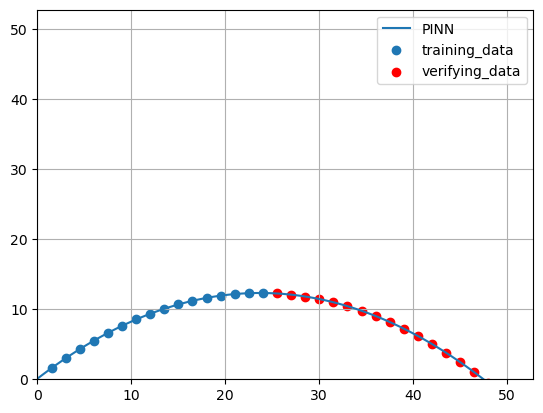

In [18]:
domain = [0.0, 2* float(x[-1])]
x_eval = torch.linspace(domain[0], domain[1], steps=100).reshape(-1, 1)
f_eval = model(x_eval)

plt.plot(x_eval.detach().numpy(), f_eval.detach().numpy(), label="PINN")
plt.scatter(x.detach().numpy(), y.detach().numpy(), label='training_data')
plt.scatter(x_second_half.detach().numpy(), y_second_half.detach().numpy(), c="red", label="verifying_data")
plt.grid(which="Major")
plt.xlim(0, float(x[-1]) * 1.1 * 2)
plt.ylim(0, float(x[-1]) * 1.1 * 2)
plt.legend()
plt.savefig("Trajectory_With_PINN.png")
plt.show()

# Now with custom gravity

In [19]:
def physics_loss(model, x):
    vx = 15.0

    # 1. Create a tensor for 'g' that matches the shape of 'x'
    # Logic: Where (0 <= x <= 30), g is 9.81. Elsewhere, g is -9.81.

    # We use torch.where(condition, value_if_true, value_if_false)
    g_field = torch.where(
        (x >= 0.0) & (x <= 20.0),
        torch.tensor(9.81, device=x.device),
        torch.tensor(-9.81, device=x.device)
    )

    # 2. Forward pass
    y = model(x)

    # 3. Derivatives
    dy_dx = torch.autograd.grad(y, x, torch.ones_like(y), create_graph=True)[0]
    d2y_dx2 = torch.autograd.grad(dy_dx, x, torch.ones_like(dy_dx), create_graph=True)[0]

    # 4. Calculate Residual
    # Note: g_field is now a list of values matching 'x', so this subtraction
    # happens element-wise automatically.
    physics_residual = d2y_dx2 + (g_field / (vx**2))

    return torch.mean(physics_residual**2)

In [20]:
# train the NN
lambda_physics = 1e-1  # 1e-2
x_physics = torch.linspace(0, 50, 100).view(-1, 1).requires_grad_(True)

model = simple_Tanh_NN()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

x.requires_grad_(True)

for ep in range(3000):
  optimizer.zero_grad()

  pred = model(x)
  loss_data = loss_fn(pred, y)
  lambda_data = 1e-4
  loss_phys = physics_loss(model, x_physics)
  loss = (lambda_data * loss_data) + (lambda_physics * loss_phys)


  loss.backward()
  optimizer.step()

  if ep % 500 == 0:
    print(f"epoch: {ep}, loss: {loss.item():>7f}")
    print(f"loss_data: {loss_data.item():>7f}, loss_physics: {loss_phys.item():>7f}")


epoch: 0, loss: 0.045439
loss_data: 452.507599, loss_physics: 0.001887
epoch: 500, loss: 0.000262
loss_data: 0.552637, loss_physics: 0.002072
epoch: 1000, loss: 0.000221
loss_data: 0.335324, loss_physics: 0.001873
epoch: 1500, loss: 0.000159
loss_data: 0.044816, loss_physics: 0.001541
epoch: 2000, loss: 0.000141
loss_data: 0.020418, loss_physics: 0.001385
epoch: 2500, loss: 0.000096
loss_data: 0.019654, loss_physics: 0.000940


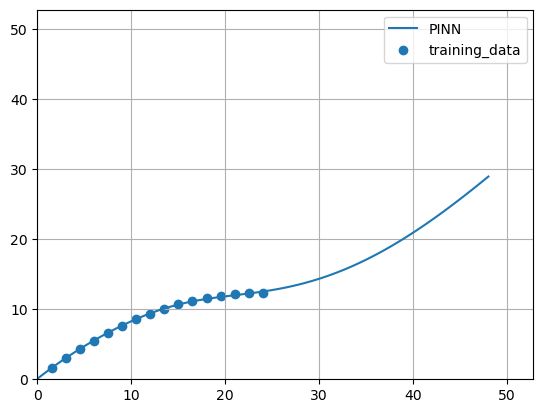

In [21]:
domain = [0.0, 2* float(x[-1])]
x_eval = torch.linspace(domain[0], domain[1], steps=100).reshape(-1, 1)
f_eval = model(x_eval)

plt.plot(x_eval.detach().numpy(), f_eval.detach().numpy(), label="PINN")
plt.scatter(x.detach().numpy(), y.detach().numpy(), label='training_data')
# plt.scatter(x_second_half.detach().numpy(), y_second_half.detach().numpy(), c="red", label="verifying_data")
plt.grid(which="Major")
plt.xlim(0, float(x[-1]) * 1.1 * 2)
plt.ylim(0, float(x[-1]) * 1.1 * 2)
plt.legend()
plt.savefig("Trajectory_With_PINN.png")
plt.show()

In [22]:
# arr1 = np.arange(0, 9).reshape(3, 3)
# print(arr1)

# mask = arr1 > 4
# # print(arr1[mask])
# print(mask)
# arr1[mask] = 0
# print(arr1)

# arr2 = np.arange(1, 13).reshape(3, 4)
# print(arr2)
# arr3 = arr2.T
# print(arr3)

# 3 Cases to customizing gravity Field

In [23]:
# with strictly defined intervals
# JUpiter ICy moon Explorer
def get_gravity_field(x):
    """
    Returns g(x) based on multiple zones.
    Zone 1 (0-10): Normal Gravity (9.81)
    Zone 2 (10-20): Iron Deposit (High Gravity 12.0)
    Zone 3 (20-30): Cavity/Water (Low Gravity 8.0)
    Default: Zero gravity elsewhere
    """
    # Initialize g with zeros (or a default value) matching the shape of x
    g = torch.zeros_like(x)

    # Create Boolean Masks (True/False maps)
    mask_zone1 = (x >= 0.0) & (x < 10.0)
    mask_zone2 = (x >= 10.0) & (x < 20.0)
    mask_zone3 = (x >= 20.0) & (x <= 30.0)

    # Apply values using the masks
    # We add them up. Since masks are exclusive (a point is only in one zone),
    # this works perfectly.
    g = g + mask_zone1 * 9.81
    g = g + mask_zone2 * 12.0
    g = g + mask_zone3 * 8.0

    return g

# Usage inside physics_loss:
def physics_loss(model, x):
    y = model(x)
    # ... calculate derivatives d2y_dx2 ...

    # Just call your helper function!
    g_field = get_gravity_field(x)

    residual = d2y_dx2 + (g_field / vx**2)
    return torch.mean(residual**2)

In [24]:
# with function defined gravity field
def get_gravity_continuous(x):
    """
    Example: Gravity fluctuates like a wave due to underlying density changes.
    Base gravity 9.81, plus a sine wave fluctuation.
    """
    base_g = 9.81

    # A fluctuation with amplitude 2.0 and frequency based on x
    fluctuation = 2.0 * torch.sin(x * 0.5)

    return base_g + fluctuation

In [ ]:
# # with real world (i.e.sensor data)
# # 1. Train a small "Surrogate" network to learn your gravity map FIRST
# class GravityMapNet(nn.Module):
#     def forward(self, x):
#         # A simple network that predicts 'g' given 'x'
#         return ...

# # Load your pre-trained gravity map
# gravity_model = GravityMapNet()
# gravity_model.load_state_dict(...)
# gravity_model.eval() # Set to evaluation mode (freeze it)

# # 2. Use it inside your PINN loss
# def physics_loss(pinn_model, x):
#     # ... calculate PINN derivatives ...

#     # Ask the gravity network what the gravity is at these points
#     # We use .detach() because we don't want to train the gravity map,
#     # we just want to read from it.
#     g_field = gravity_model(x).detach()

#     residual = d2y_dx2 + (g_field / vx**2)
#     return torch.mean(residual**2)

TypeError: Expected state_dict to be dict-like, got <class 'ellipsis'>.